## Iris Flower Classification

Iris flower has three species setosa, versicolor, and virginica, which differs according to their
measurements.We have the measurements of the iris flowers according to
their species, and here task is to train a machine learning model that can learn from the
measurements of the iris species and classify them.

### Steps followed:
1. **Loading the dataset**
2. **Exploratort Data Analysis**
3. **Predictive Modelling**
4. **Comparing Metrics**

In [59]:
# IMPORTING REQUIRED LIBRARIES FOR EXPLORATORY DATA ANALYSIS AND MACHINE LEARNING
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score
from sklearn.model_selection import train_test_split

In [16]:
df = pd.read_csv('iris.csv')

In [17]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### Statistical Information about Numerical Features

In [18]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Checking for NULL Values

In [19]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**Getting Number of Flower Species**

In [20]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

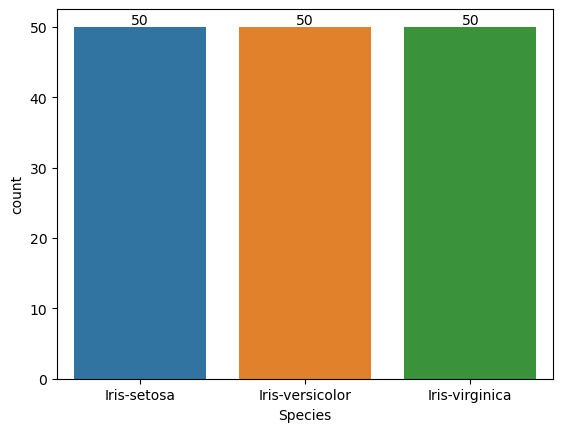

In [21]:
plot = sns.countplot(data=df,x='Species')
# Getting values on top of bar
for i in plot.containers:
    plot.bar_label(i,)

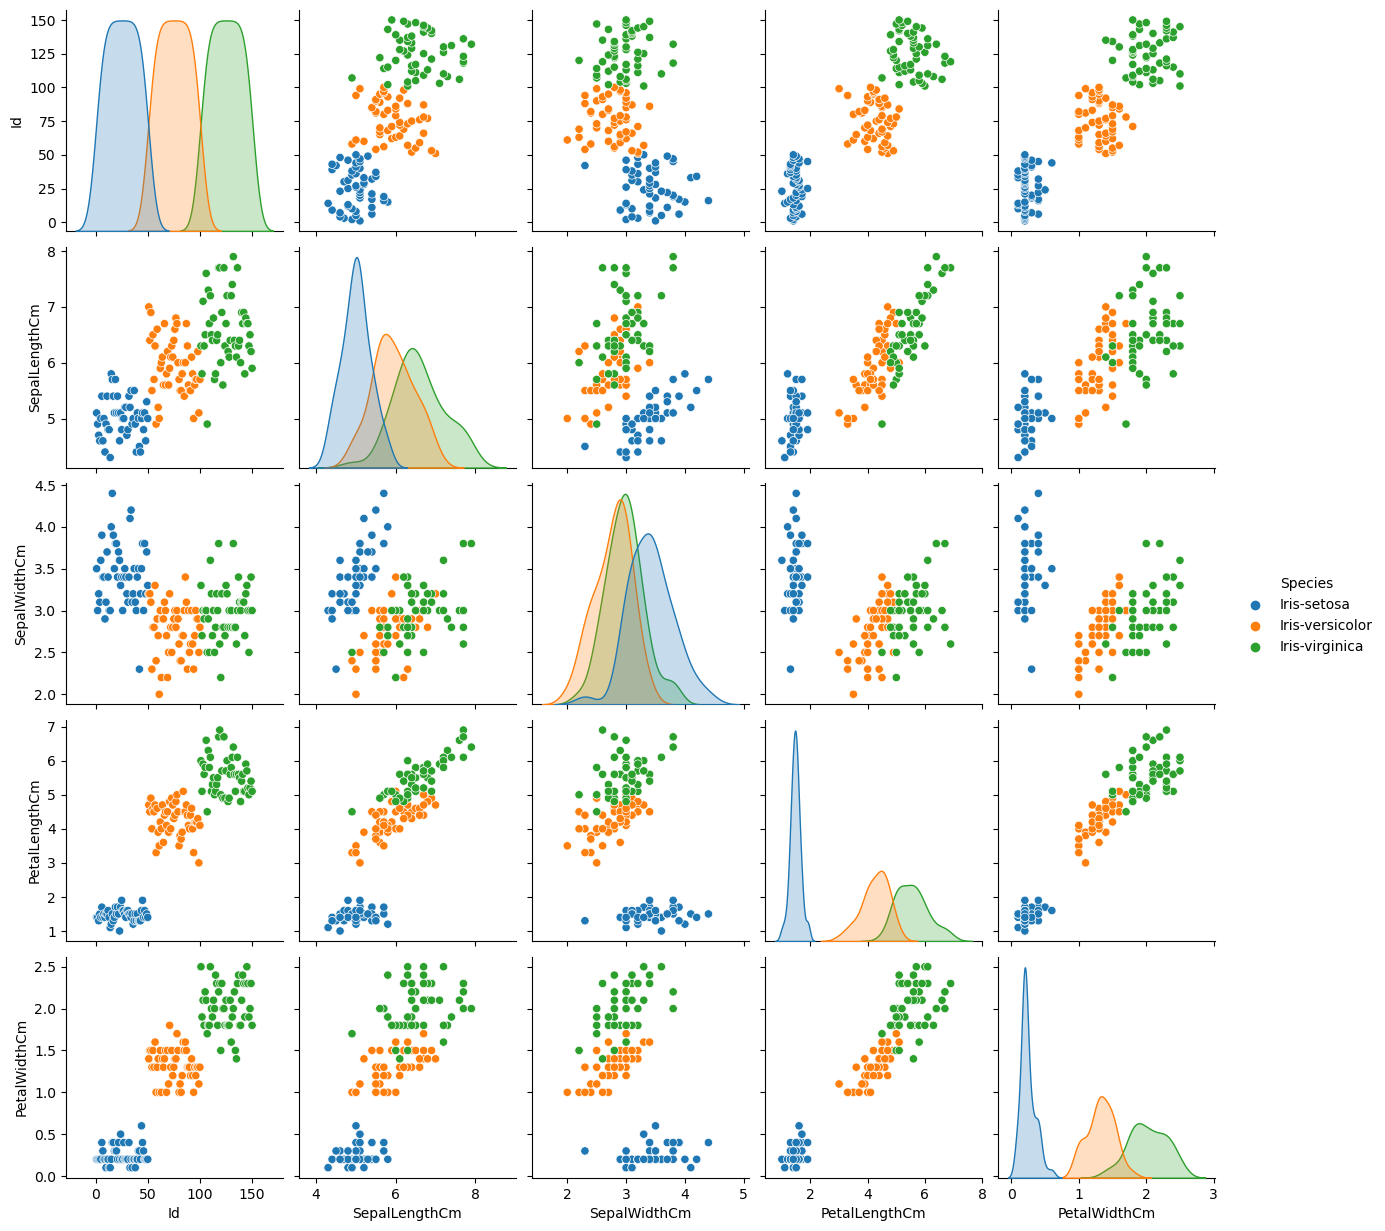

In [22]:
sns.pairplot(df,hue='Species')

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

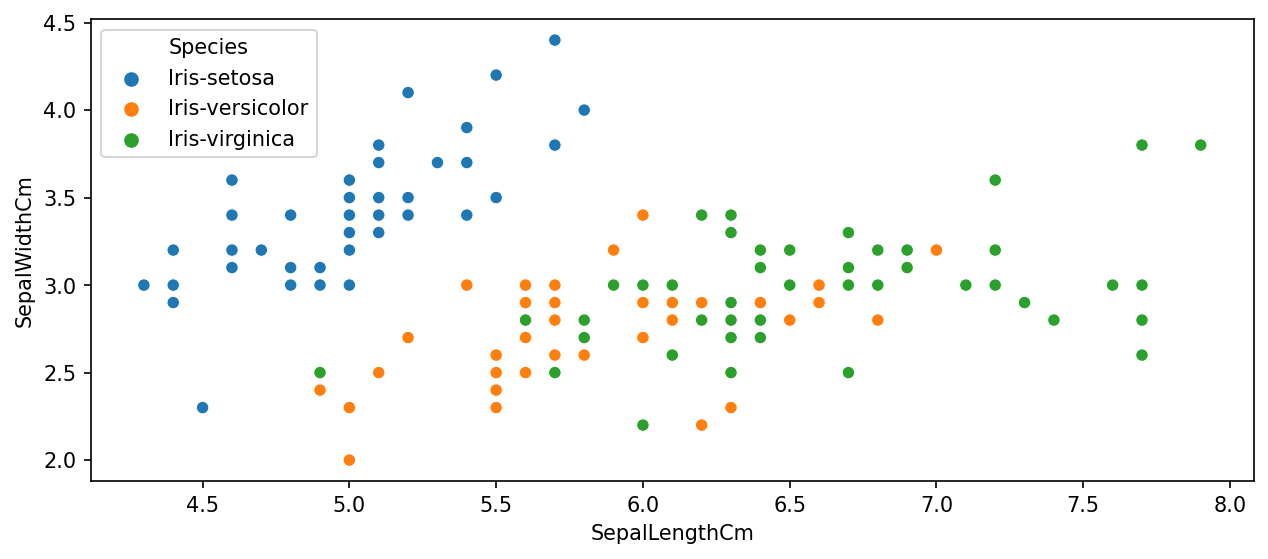

In [35]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=df,x='SepalLengthCm',y='SepalWidthCm',hue='Species')

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

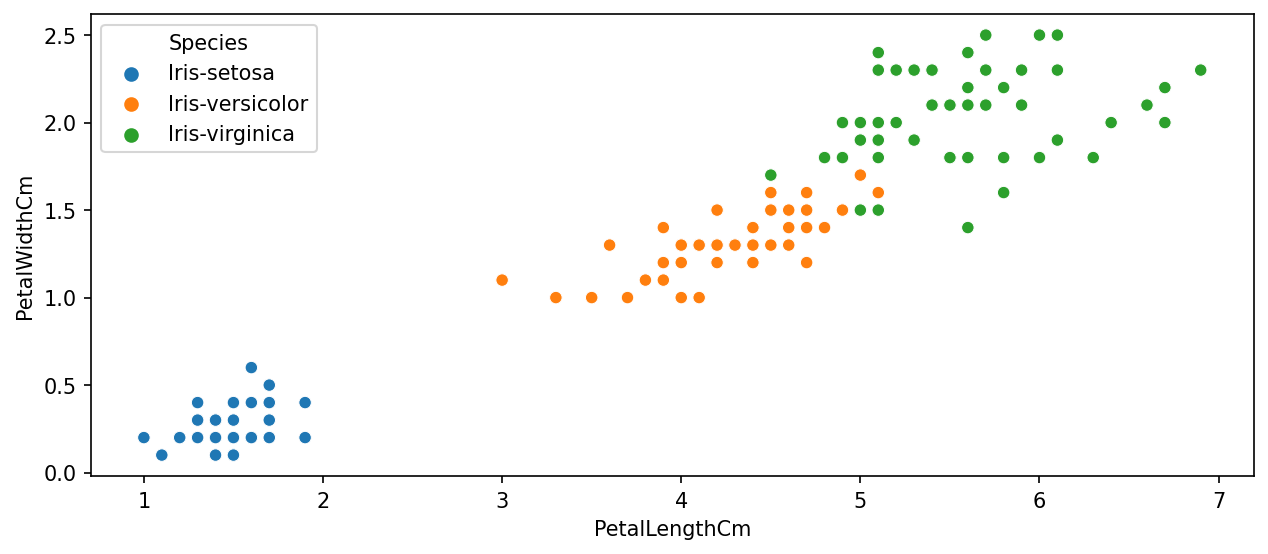

In [24]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=df,x='PetalLengthCm',y='PetalWidthCm',hue='Species')

### Getting Correlation between Numerical Features

In [25]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

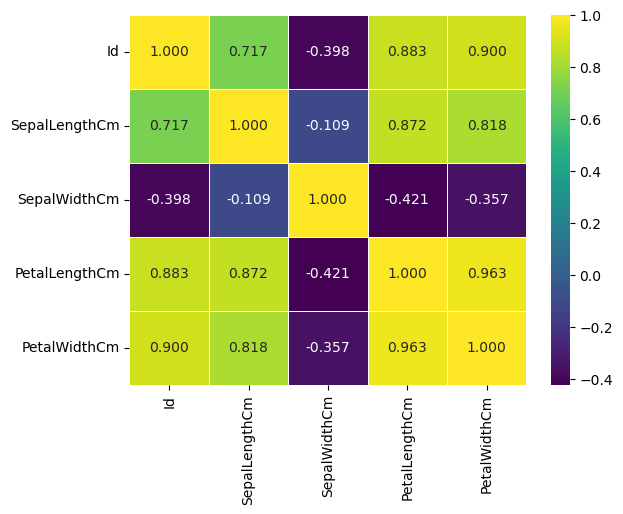

In [40]:
sns.heatmap(df.corr(),annot=True,fmt='.3f',lw=0.5,cmap='viridis')

In [27]:
px.box(data_frame=df,x='SepalLengthCm',title='Boxplot of Sepal Length')

In [29]:
df.describe()['SepalLengthCm']

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: SepalLengthCm, dtype: float64

### Splitting the data intoTrain,Test

In [30]:
X = df.drop('Species',axis=1)
y = df['Species']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [38]:
# CREATING INSTANCES OF MACHINE LEARNING ALGORITHMS
log_model = LogisticRegression()
knn_model = KNeighborsClassifier()
svc_model = SVC()

In [39]:
# FITTING THE MODELS WITH TRAIN DATA
log_model.fit(X_train,y_train)
knn_model.fit(X_train,y_train)
svc_model.fit(X_train,y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



SVC()

### Comparing Confusion Matrices of Models

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



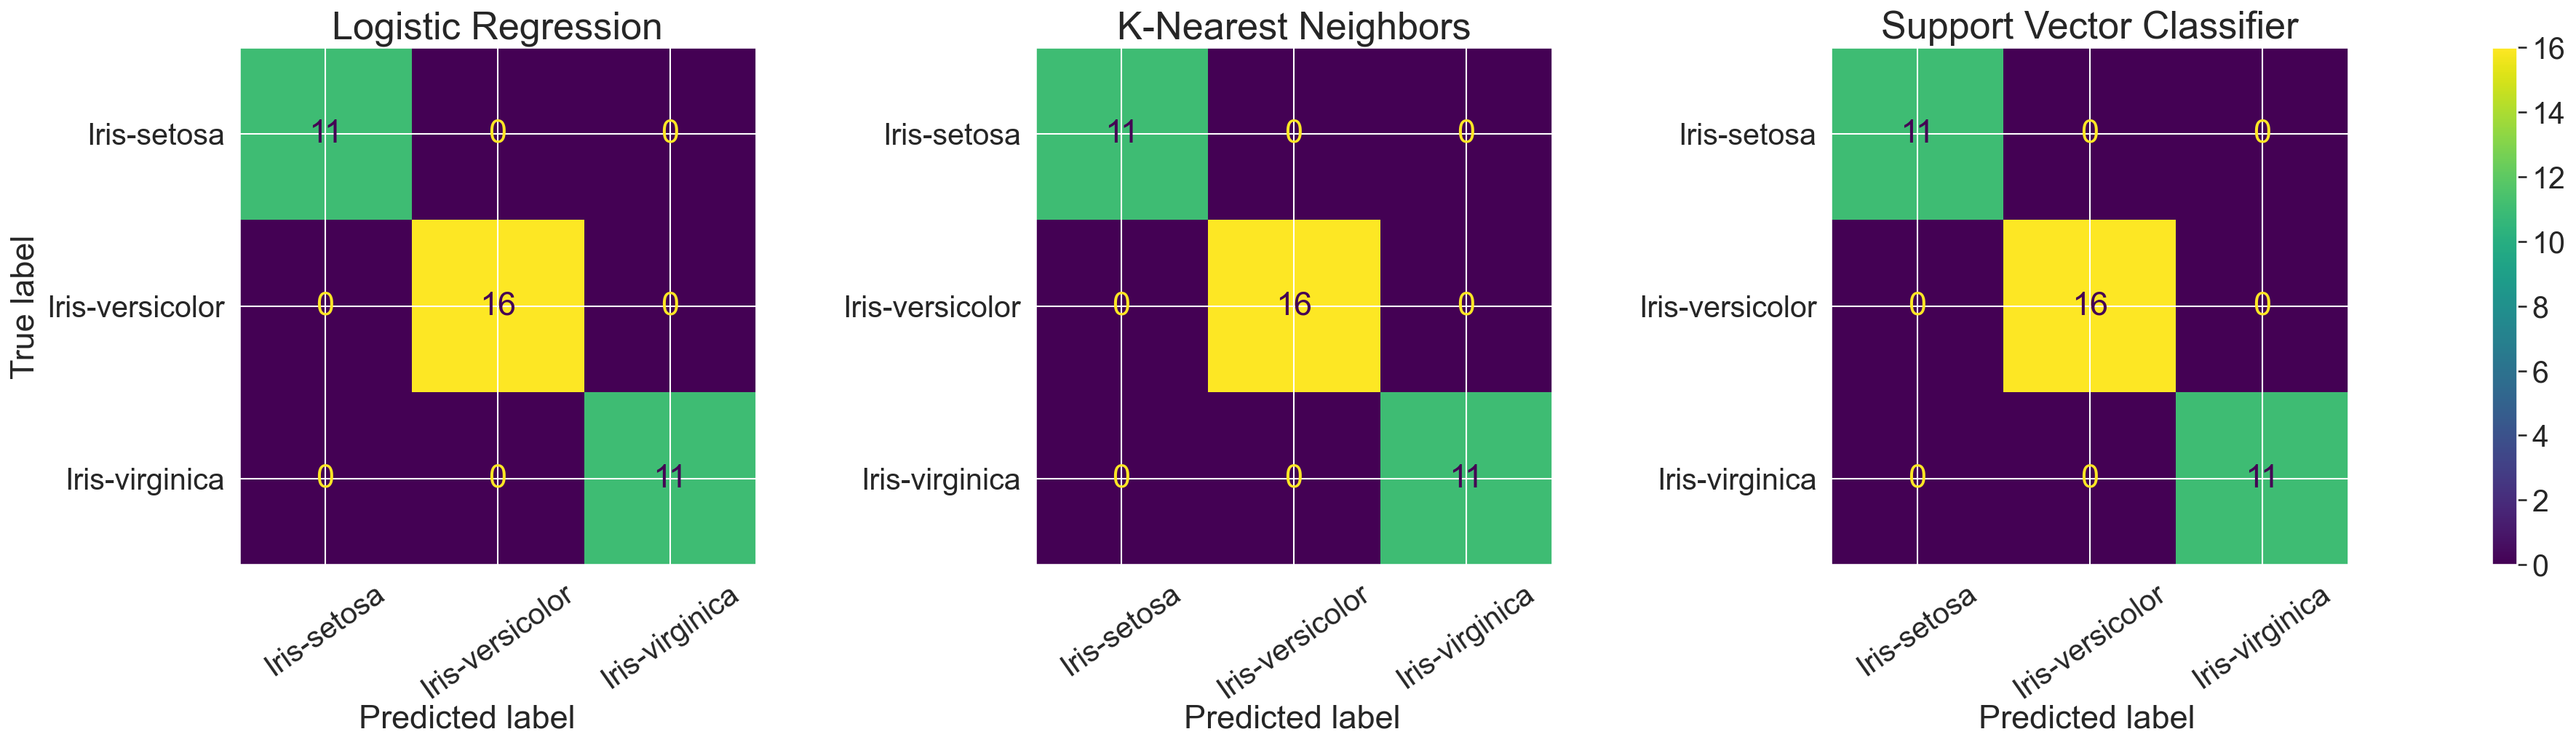

In [56]:
# Initialising Machine Learning classification models as a dictionary
classifiers = {
    "Logistic Regression": log_model,
    "K-Nearest Neighbors": knn_model,
    "Support Vector Classifier":svc_model
}
# Creating subplots of shape 
fig, axes = plt.subplots(1, 3, figsize=(28,7),dpi=150)
sns.set(font_scale=1.8)
# Iterating over the classifiers dictionary using enumerate keyword
for i, (key, classifier) in enumerate(classifiers.items()):
    y_pred = classifier.predict(X_test)
    # Creating a Confusion Matrix for classifier model
    cf_matrix = confusion_matrix(y_test, y_pred)
    # Passing that Confusion Matrix in ConfusionMatrixDisplay,,it takes matrix and target feature labels
    disp = ConfusionMatrixDisplay(cf_matrix,
                                  display_labels=classifier.classes_)
    # Assigning place for Confusion Matrix in subplots and rotating the X_ticks
    disp.plot(ax=axes[i], xticks_rotation=35)
    # Setting title for each Confusion Matrix,,title is key values in classifier dictionary
    disp.ax_.set_title(key,fontdict={'fontsize':25})
    # Intially a color bar will be generated for each matrix seperately,,
    # So,in the function we do remove that color bar and plot it outside of function
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')
        
# Displaying xLabel as text in figure        
fig.text(0.15, 0.015, 'Predicted label', ha='left')
fig.text(0.42, 0.015, 'Predicted label', ha='left')
fig.text(0.68, 0.015, 'Predicted label', ha='left')
# Setting tight_layout() for subplots
plt.tight_layout()
# Now,getting colorbar for Confusion Matrix
fig.colorbar(disp.im_, ax=axes)
plt.show()        

### Getting Accuracy Scores of Models

In [60]:
models_list = [log_model,knn_model,svc_model]
accuracy_score_list = []

for model in models_list:
    model_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,model_pred)
    accuracy_score_list.append(accuracy)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



In [62]:
accuracy_score_df = pd.DataFrame({'Model':['log_model','knn_model','svc_model'],
                                 'Accuracy Score':accuracy_score_list})
accuracy_score_df

,Model,Accuracy Score
0,log_model,1.0
1,knn_model,1.0
2,svc_model,1.0


### Final Result:
**For Iris Dataset,Logistic regression,K-Nearest Neighbors Classifier,Support Vector Machine Classifier Models are performing better.**